In [59]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from glob2 import glob
import pandas as pd
import shutil
from tqdm.notebook import trange, tqdm
import os

In [2]:
file  = 'realtime_evaluation/depthmaps/1583461362-i9jb5pwo2e/100/pc_1583461362-i9jb5pwo2e_1591122103119_100_000.p'
depthmap, targets = pickle.load(open(file, "rb"))

WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


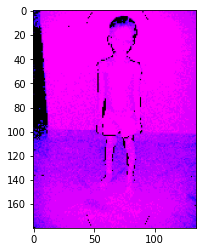

In [7]:
plt.imshow(np.squeeze(depthmap))

In [8]:
targets

array([103.6, 13.7, 13.9, 1804, 'male', 'good', None], dtype=object)

In [65]:
rgb_qrcode = 'realtime_evaluation/depthmaps/*'
rgb_data= glob(rgb_qrcode)
rgb_list = []
for qrcodes in rgb_data:
    qrc = qrcodes.split('/')[-1]
    rgb_list.append(qrc)
rgb_list

['1583462505-43bak4gvfa',
 '1583462533-hxipp8enl2',
 '1583462828-2dmyjcwrkp',
 '1583465464-wp4uhlpyvo',
 '1583509169-59obayuk18',
 '1583511115-ea9nmuc8qk',
 '1583584872-j9z38sk7ky',
 '1583654709-e2r4mbe7j2',
 '1583654740-795bvonbu0',
 '1583655035-x5wosyip2d',
 '1583683703-erlmpe14ug',
 '1583740747-3retnv4b8d',
 '1583830760-ps06afm1ms',
 '1583830956-iih0g79996',
 '1583830969-bkizvxcpo1',
 '1583831095-qwmm1mmr33',
 '1583852793-q25jfzqkuz',
 '1583942111-gu5vlfirel',
 '1583997707-txmia01gdm',
 '1583997985-zaexig1oxa',
 '1583997996-dahj59a5bu',
 '1584128367-mg64yemxh6',
 '1584174042-mz35jgyhe6',
 '1584241070-dfzi5gbgs3',
 '1584249719-uoibvyjllm',
 '1584927524-4ee04wwzr7',
 '1584994118-vi6zfw8kbe',
 '1584995101-drh9xoy38u',
 '1584995211-rv9j72e9kf',
 '1584996506-bd7jpz7phe',
 '1584996565-g64vwn88ms',
 '1584996576-937jqri6im',
 '1584996582-vqrq7pd1g2',
 '1584996623-3udur036kh',
 '1584996690-arxyuxier2',
 '1584997308-vgvawrf0gw',
 '1584997341-cp73jlqqkp',
 '1584997441-lizj1l0gry',
 '1584997869

In [66]:
dataframe= pd.read_csv('evaluation.csv')
data_list =  dataframe['qrcode'].unique()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
data_list = data_list.tolist()

In [68]:
len(rgb_list)

3000

In [69]:
remaining = set(rgb_list) - set(data_list)
remaining

set()

In [63]:
os.mkdir('remaining_depth')

In [57]:
len(remaining)
# len(set(rgb_list))

542

In [64]:
for data in tqdm(remaining):
    target = 'remaining_depth/'
    source ='realtime_evaluation/depthmaps/'+data
    shutil.move(source, target, copy_function = shutil.copytree)

In [76]:
from azureml.core import Workspace, Dataset
ws = Workspace.from_config()
dataset = Dataset.get_by_name(ws, name='anon-realtime-testdata')
mount_context = dataset.mount()
mount_context.start()  # this will mount the file streams
print(mount_context.mount_point)
type(dataset)

/tmp/tmpsugdzy0v


azureml.data.file_dataset.FileDataset

In [77]:
!ls /tmp/tmpsugdzy0v/scans/1585004725-18cqo1np0j

100  101  102
